<div hidden>
    $\newcommand{\q}{\left}$
    $\newcommand{\w}{\right}$
    $\newcommand{\m}{\middle}$
    $\newcommand{\e}{\boldsymbol}$
    $\newcommand{\cb}{\mspace{3mu}\m\vert\mspace{3mu}}$
</div>

<center>
    Sveučilište u Zagrebu<br>
    Fakultet elektrotehnike i računarstva<br>
    <a href="http://www.fer.unizg.hr/predmet/map">Multivarijatna analiza podataka</a><br>
    Ak. god. 2022./23.    
</center>

<h1>
    Laboratorijska vježba 3: <br> Diskriminantna analiza, metode grupiranja i udaljenosti, analiza korespondencije
</h1>

---

## Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa  &mdash; ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

---

## Podatkovni skup

U ovoj laboratorijskoj vježbi analizirat ćemo skup podataka s oko 1500 najpoznatijih klasičnih skladbi prema glasovima korisnika stranice [classicalmusiconly.com](https://classicalmusiconly.com/).
Opis varijabli dan je u tablici u nastavku:

<table>
    <thead>
        <tr>
            <th>Naziv stupca</th>
            <th>Opis</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>title</code></td>
            <td>naziv skladbe</td>
        </tr>
        <tr>
            <td><code>category</code></td>
            <td>kategorija kojoj skladba pripada<br>(sonata, simfonija, itd.)</td>
        </tr>
        <tr>
            <td><code>composer</code></td>
            <td>ime skladatelja</td>
        </tr>
        <tr>
            <td><code>year</code></td>
            <td>godina kada je skladba napisana</td>
        <tr>
            <td><code>epoch</code></td>
            <td>stilsko razdoblje</td>
        </tr>
        <tr>
            <td><code>country</code></td>
            <td>država rođenja skladatelja</td>
        <tr>
            <td><code>stars</code></td>
            <td>broj glasova <br> (koliko korisnika je označilo skladbu kao favorit))</td>
        </tr>
    </tbody>
</table>

---

Učitajte datoteku `classical_data.csv` i proučite podatke.
Varijable `category`, `composer`, `epoch` i `country` treba tretirati kao da se radi o kategorijskim varijablama.
Ispišite nekoliko redaka iz tablice.

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import MDS
from prince import CA, MCA
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [30]:
# Load the CSV file
data = pd.read_csv('classical_data.csv', dtype={'category': 'category', 'composer':'category', 'epoch':'category', 'country':'category'})
# Convert selected columns to categorical variables
categorical_columns = ['category', 'composer', 'epoch', 'country']
data[categorical_columns] = data[categorical_columns].astype('category')

# Print a few rows from the table
print(data.head())

   Unnamed: 0                                   title         category  \
0           1  The Four Seasons (Le Quattro Stagioni)  Violin Concerto   
1           2              Requiem in D Minor, K. 626   Mass / Requiem   
2           3      Symphony No. 9 in D Minor, Op. 125         Symphony   
3           4                               Nocturnes     Piano Sonata   
4           5                       Swan Lake, Op. 20           Ballet   

                   composer  year           epoch  country  stars  
0           Antonio Vivaldi  1723         Baroque    Italy   2515  
1   Wolfgang Amadeus Mozart  1791       Classical  Austria   2122  
2      Ludwig van Beethoven  1824  Early Romantic  Germany   2084  
3           Frédéric Chopin  1846        Romantic   Poland   1999  
4  Pyotr Ilyich Tchaikovsky  1876        Romantic   Russia   1335  


---

## 1. Grupiranje

U ovom zadatku ćemo grupirati kategorije skladbi na temelju njihove sličnosti.

<b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj.

In [31]:
contingency_table = pd.crosstab(data['composer'], data['category'])

print(contingency_table.shape)
contingency_table


(126, 38)


category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,4,0,0,0,0,1
Alban Berg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
Alessandro Scarlatti,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Borodin,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
Alexander Glazunov,2,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
William Walton,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Witold Lutosławski,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0


---

Prije nego što nastavimo s grupiranjem, željeli bismo smanjiti broj kategorija koje ćemo uzeti u obzir. <br>
<b>b)</b> Grafički prikažite ukupan broj skladbi po pojedinoj kategoriji, <i>sortirano</i> uzlazno.
Zatim proizvoljno odredite prag, te izbacite sve kategorije (stupce kontingencijske tablice) koje po Vašem kriteriju sadrže premalo skladbi.
Ako nakon izbacivanja u tablici preostanu skladatelji koji imaju ukupno 0 skladbi, izbacite i takve retke. <br>
<b>Prikažite dobivenu tablicu i graf temeljem kojega ste odredili prag.</b>

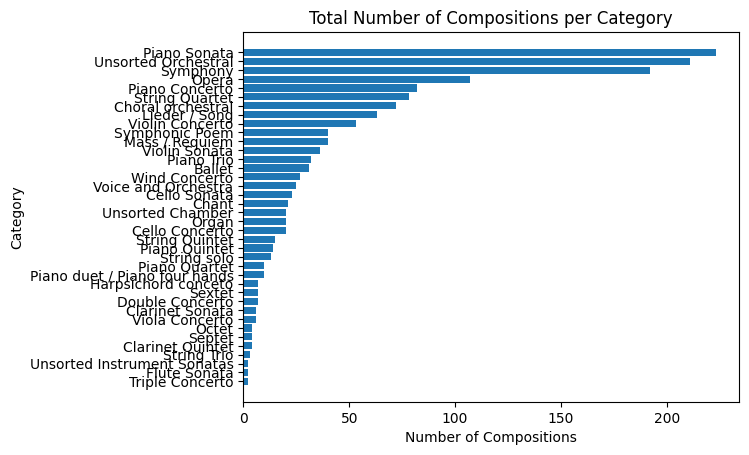

(125, 11)


category,Choral orchestral,Lieder / Song,Mass / Requiem,Opera,Piano Concerto,Piano Sonata,String Quartet,Symphonic Poem,Symphony,Unsorted Orchestral,Violin Concerto
composer,,,,,,,,,,,
Aaron Copland,0,0,0,0,0,0,0,0,1,4,0
Alban Berg,0,1,0,2,0,1,1,0,0,2,1
Alessandro Scarlatti,3,0,0,0,0,1,0,0,0,0,0
Alexander Borodin,0,0,0,1,0,0,2,1,3,0,0
Alexander Glazunov,0,0,0,0,1,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,3,0,0,1,0,0,0,1,0
William Walton,0,0,0,0,0,0,0,0,0,0,1
Witold Lutosławski,0,0,0,0,1,1,0,0,2,3,0


In [32]:
category_counts = data['category'].value_counts().sort_values()
plt.barh(category_counts.index, category_counts.values)
plt.xlabel('Number of Compositions')
plt.ylabel('Category')
plt.title('Total Number of Compositions per Category')
plt.show()


threshold = 40

selected_categories = category_counts[category_counts >= threshold].index
filtered_data = data[data['category'].isin(selected_categories)]

contingency_table = pd.crosstab(filtered_data['composer'], filtered_data['category'])

contingency_table = contingency_table.loc[contingency_table.sum(axis=1) > 0]
print(contingency_table.shape)
contingency_table



---

<b>c)</b> Provedite hijerarhijsko aglomerativno grupiranje (engl. <i>hierarchical agglomerative clustering</i>) nad <b>kategorijama.</b> Kao mjeru udaljenosti među kategorijama koristite <b>kosinusnu udaljenost</b> među stupcima kontingencijske tablice koju ste prethodno izračunali. Isprobajte različite metode za <b>spajanje grupa</b> (engl. <i>linkage</i>), te:
<ol>
    <li><b>nacrtajte dendrogram</b> za dobiveno grupiranje (vidi <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html">poveznicu</a> za pomoć),</li>
    <li>prema dendrogramu <b>odredite broj grupa.</b></li>
</ol>
<b>Odaberite jednu metodu povezivanja</b> koja Vam daje rezultate koje najlakše možete interpretirati.
U obzir uzmite balansiranost veličina klastera.
<b>Prikažite dendrogram</b> i <b>ispišite nazive kategorija</b> u pojedinoj grupi u konačnom rezultatu grupiranja.

In [33]:
distance_matrix = pairwise_distances(contingency_table.T, metric='cosine')
distance_matrix.shape

(11, 11)

C:\Users\matij\AppData\Local\Temp\ipykernel_12644\4101219600.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='complete')


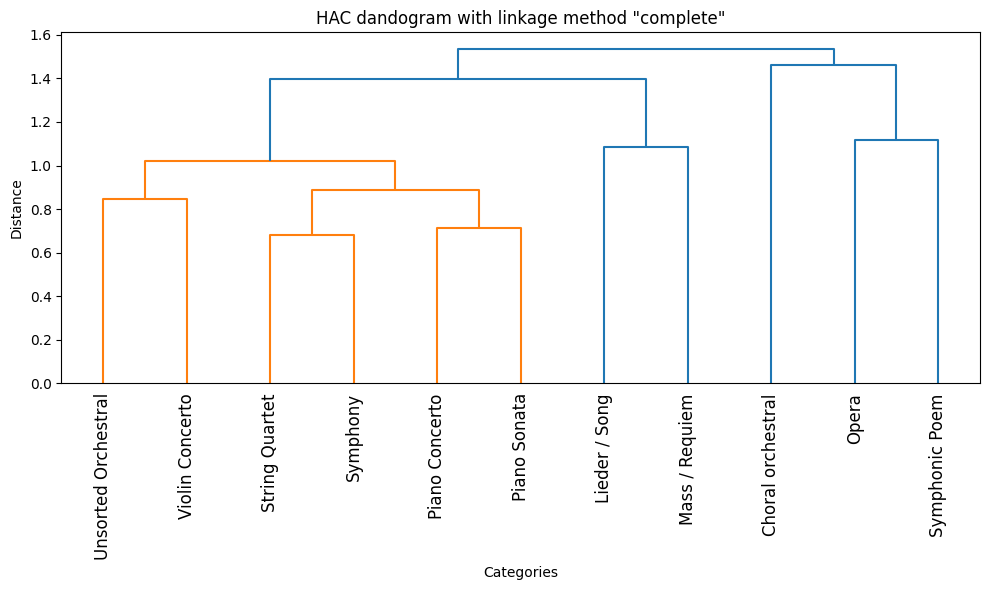

In [34]:
linkage_matrix = linkage(distance_matrix, method='complete')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=contingency_table.columns, leaf_rotation=90)
plt.title('HAC dandogram with linkage method "complete"')
plt.xlabel('Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

C:\Users\matij\AppData\Local\Temp\ipykernel_12644\293912595.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


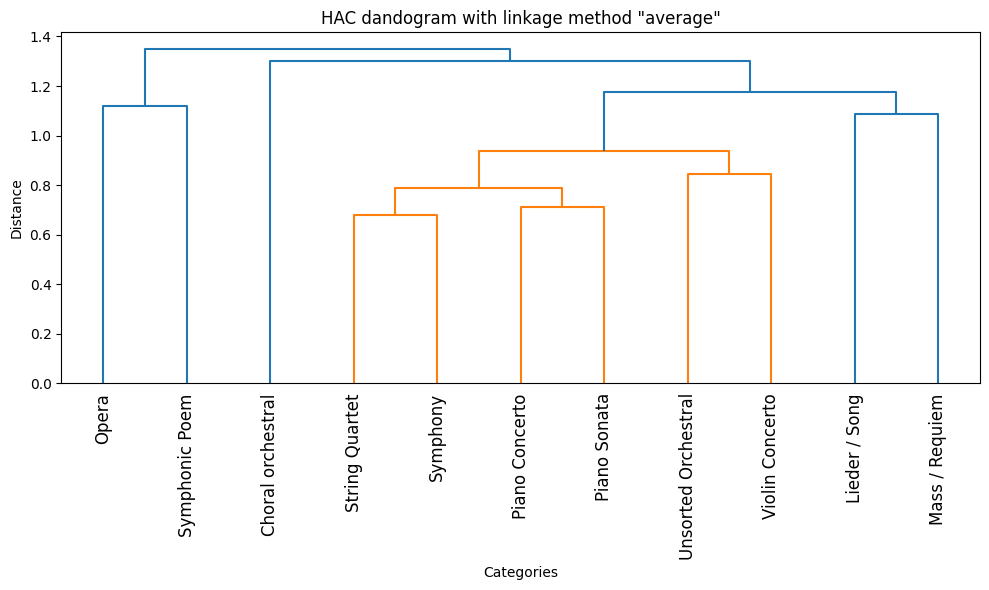

In [35]:
linkage_matrix = linkage(distance_matrix, method='average')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=contingency_table.columns, leaf_rotation=90)
plt.title('HAC dandogram with linkage method "average"')
plt.xlabel('Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

C:\Users\matij\AppData\Local\Temp\ipykernel_12644\1345755056.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='single')


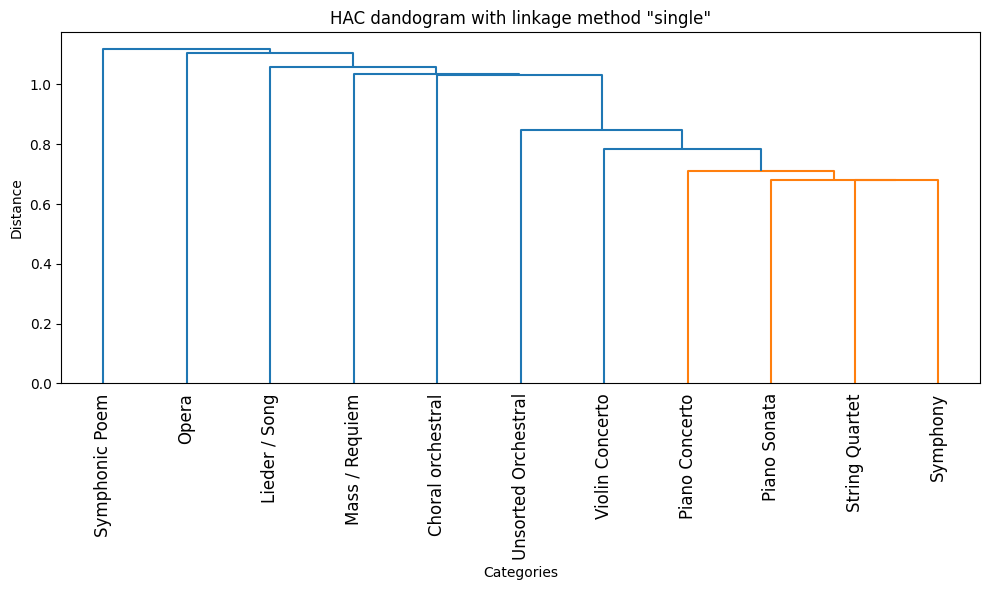

In [36]:
linkage_matrix = linkage(distance_matrix, method='single')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=contingency_table.columns, leaf_rotation=90)
plt.title('HAC dandogram with linkage method "single"')
plt.xlabel('Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

---

## 2. Linearna diskriminantna analiza

U ovom zadatku želimo vizualizirati klasifikaciju skladatelja s obzirom na to kojem stilskom razdoblju pripadaju, koristeći izvedene značajke temeljene na kategorijama skladbi koje su pisali.

---

<b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj, kao i u <b>1. a)</b>. Zatim, standardizirajte retke kontingencijske tablice na način da od svakog retka oduzmete njegovu srednju vrijednost, te ga podijelite s njegovom standardnom devijacijom.
<b>Prikažite ovako standardiziranu tablicu</b> te se uvjerite da su srednje vrijednosti svih redaka jednake 0 i njihove devijacije jednake 1.

In [37]:
contingency_table_2 = pd.crosstab(data['composer'], data['category'])
scaler = StandardScaler()
standardized_table = pd.DataFrame(scaler.fit_transform(contingency_table_2.T).T, index=contingency_table_2.index, columns=contingency_table_2.columns)



print(standardized_table.mean(axis=1))
print(standardized_table.std(axis=1))
standardized_table

composer
Aaron Copland             -4.090295e-17
Alban Berg                 7.304099e-17
Alessandro Scarlatti      -2.775558e-17
Alexander Borodin          3.213803e-17
Alexander Glazunov         7.011935e-17
                               ...     
William Byrd              -5.843279e-17
William Walton             1.022574e-16
Witold Lutosławski         7.888427e-17
Wolfgang Amadeus Mozart   -2.921640e-17
Zoltán Kodály             -1.782200e-16
Length: 126, dtype: float64
composer
Aaron Copland              1.013423
Alban Berg                 1.013423
Alessandro Scarlatti       1.013423
Alexander Borodin          1.013423
Alexander Glazunov         1.013423
                             ...   
William Byrd               1.013423
William Walton             1.013423
Witold Lutosławski         1.013423
Wolfgang Amadeus Mozart    1.013423
Zoltán Kodály              1.013423
Length: 126, dtype: float64


category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2.447374,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,-0.287926,...,1.079724,-0.287926,-0.287926,-0.287926,5.182673,-0.287926,-0.287926,-0.287926,-0.287926,1.079724
Alban Berg,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,-0.404061,...,-0.404061,-0.404061,-0.404061,-0.404061,3.434519,-0.404061,1.515229,-0.404061,-0.404061,-0.404061
Alessandro Scarlatti,-0.209657,-0.209657,-0.209657,-0.209657,5.765567,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,...,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657,-0.209657
Alexander Borodin,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,...,4.687755,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676,-0.306676
Alexander Glazunov,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,...,3.591997,-0.364405,-0.364405,-0.364405,-0.364405,-0.364405,1.613796,-0.364405,-0.364405,1.613796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,-0.292770,-0.292770,-0.292770,1.561440,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,...,-0.292770,-0.292770,-0.292770,-0.292770,1.561440,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770
William Walton,2.915476,2.915476,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,...,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,2.915476,2.915476,-0.342997,-0.342997,-0.342997
Witold Lutosławski,-0.342997,-0.342997,1.286239,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997,...,2.915476,-0.342997,-0.342997,-0.342997,4.544713,-0.342997,-0.342997,-0.342997,-0.342997,-0.342997


---

<b>b)</b> Provedite postupak višeklasne <b>linearne diskriminantne analize</b>.
Klasificirajte skladatelje prema stilskom razdoblju kojem pripadaju (jedan skladatelj pripada samo jednom razdoblju), koristeći stupce prethodno standardizirane kontingencijske tablice iz 2. b) kao značajke.<br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Koje klase se najbolje razdvajaju od ostalih na dobivenom prikazu?

In [38]:
composer_style_mapping = data.set_index('composer')['epoch'].to_dict()

target = standardized_table.index.map(composer_style_mapping)
target

Index(['20th Century', '20th Century', 'Baroque', 'Romantic', 'Late Romantic',
       'Late Romantic', 'Post-War', 'Romantic', '20th Century', 'Classical',
       ...
       '20th Century', 'Late Romantic', 'Post-War', 'Post-War', 'Post-War',
       'Medieval-Renaissance', '20th Century', 'Post-War', 'Classical',
       '20th Century'],
      dtype='object', name='composer', length=126)

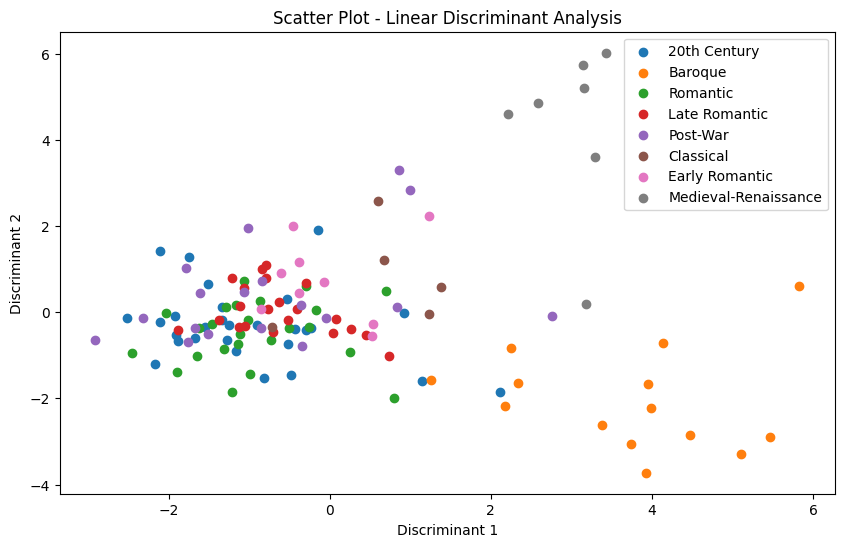

Explained Variance Ratio:
Discriminant 1: 0.36
Discriminant 2: 0.23


In [39]:

composer_style_mapping = data.set_index('composer')['epoch'].to_dict()

target = standardized_table.index.map(composer_style_mapping)


label_mapping = {category: i for i, category in enumerate(target.unique())}


target_labels = target.map(label_mapping)


lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(standardized_table, target_labels)

unique_categories = target.unique()
unique_labels = [label_mapping[category] for category in unique_categories]


plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(lda_result[target_labels == label, 0], lda_result[target_labels == label, 1], label=unique_categories[label])
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('Scatter Plot - Linear Discriminant Analysis')
plt.legend()
plt.show()


print("Explained Variance Ratio:")
for i, ratio in enumerate(lda.explained_variance_ratio_):
    print(f"Discriminant {i+1}: {ratio:.2f}")

---

<b>c)</b> Ponovite postupak višeklasne <b>linearne diskriminantne analize</b>, ovaj put nad reduciranim skupom podataka koji sadrži samo sljedeća stilska razdoblja:
`
["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"]
`. <br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Komentirajte kvalitetu dobivenog prikaza u odnosu na prethodni podzadatak.

In [40]:

selected_styles = ["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"]
selected_data = data[data['epoch'].isin(selected_styles)]


contingency_table_2 = pd.crosstab(selected_data['composer'], selected_data['category'])
scaler = StandardScaler()
standardized_table = pd.DataFrame(scaler.fit_transform(contingency_table_2.T).T, index=contingency_table_2.index, columns=contingency_table_2.columns)



print(standardized_table.mean(axis=1))
print(standardized_table.std(axis=1))

composer
Alessandro Scarlatti      -2.775558e-17
Alexander Borodin          3.213803e-17
Alexander Glazunov         7.011935e-17
Alexander Scriabin         2.191230e-17
Anton Bruckner             3.359885e-17
                               ...     
Richard Strauss           -5.843279e-17
Richard Wagner             1.314738e-17
Robert Schumann            2.629476e-17
Sergei Rachmaninoff       -5.989361e-17
Wolfgang Amadeus Mozart   -2.921640e-17
Length: 73, dtype: float64
composer
Alessandro Scarlatti       1.013423
Alexander Borodin          1.013423
Alexander Glazunov         1.013423
Alexander Scriabin         1.013423
Anton Bruckner             1.013423
                             ...   
Richard Strauss            1.013423
Richard Wagner             1.013423
Robert Schumann            1.013423
Sergei Rachmaninoff        1.013423
Wolfgang Amadeus Mozart    1.013423
Length: 73, dtype: float64


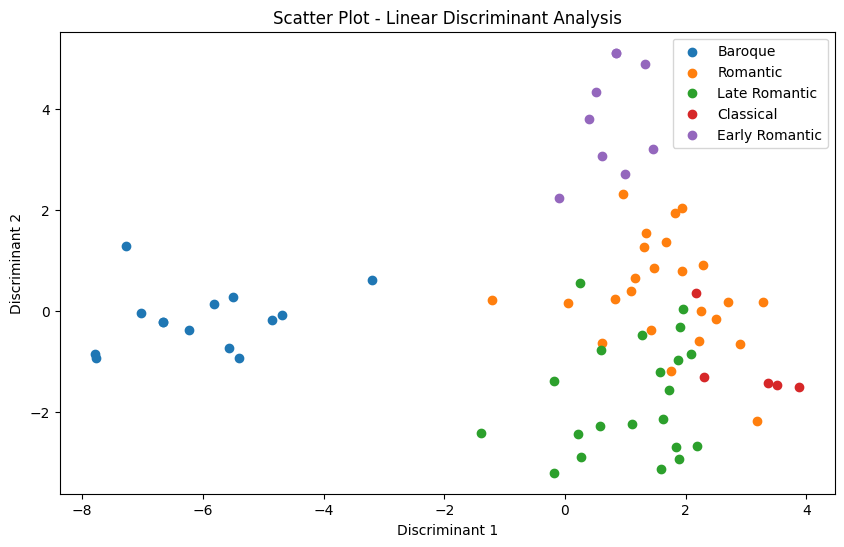

Explained Variance Ratio:
Discriminant 1: 0.61
Discriminant 2: 0.19


In [41]:
composer_style_mapping = selected_data.set_index('composer')['epoch'].to_dict()


target = standardized_table.index.map(composer_style_mapping)
composer_style_mapping = selected_data.set_index('composer')['epoch'].to_dict()

target = standardized_table.index.map(composer_style_mapping)

label_mapping = {category: i for i, category in enumerate(target.unique())}


target_labels = target.map(label_mapping)

lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(standardized_table, target_labels)

unique_categories = target.unique()
unique_labels = [label_mapping[category] for category in unique_categories]


plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(lda_result[target_labels == label, 0], lda_result[target_labels == label, 1], label=unique_categories[label])
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.title('Scatter Plot - Linear Discriminant Analysis')
plt.legend()
plt.show()

print("Explained Variance Ratio:")
for i, ratio in enumerate(lda.explained_variance_ratio_):
    print(f"Discriminant {i+1}: {ratio:.2f}")


## 3. Višedimenzionalno skaliranje

U ovom zadatku želimo vizualizirati sličnosti između pojedinih stilskih razdoblja koristeći metričko i nemetričko skaliranje.

---

<b>a)</b>
**Izračunajte i prikažite** kontingencijsku tablicu za varijable `category` i `epoch` (stilsko razdoblje).
Neka retci sadrže kategorije, a stupci stilska razdoblja.

In [42]:
contingency_table = pd.crosstab(data['category'], data['epoch'])

contingency_table

epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
category,,,,,,,,
Ballet,19,2,0,0,6,0,0,4
Cello Concerto,6,0,5,0,2,0,2,5
Cello Sonata,3,0,0,5,6,0,2,7
Chant,1,0,0,0,2,10,4,4
Choral orchestral,7,42,6,2,5,2,2,6
Clarinet Quintet,0,0,1,1,1,0,0,1
Clarinet Sonata,1,0,0,0,2,0,0,3
Double Concerto,1,1,2,0,0,0,0,3
Flute Sonata,1,1,0,0,0,0,0,0


---

<b> b)</b> **Izračunajte** udaljenosti među stilskim razdobljima koristeći *totalnu varijacijsku udaljenost*. 
Neka je $C$ kontingencijska matrica dimenzija $N \times M$, te neka su kategorije skladbi raspoređene po retcima, a stilska razdoblja po stupcima. Totalna varijacijska daljenost između dva stilska razdboblja $i$ i $j$ računa se kao
$$
\delta_{i,j} = \frac{1}{2} \sum_{k=1}^N \left\lvert \frac{C_{k,i}}{S_i} - \frac{C_{k,j}}{S_j} \right\rvert,
$$
gdje je $S_i = \sum_{k=1}^N C_{k,i}$. **Izračunajte i prikažite** matricu udaljenosti $\Delta$ čiji elementi su $\Delta_{i, j} = \delta_{i, j}$. <br>
Provjerite koji parovi kategorija su najsličniji, a koji najrazličitiji.

In [43]:
S = contingency_table.sum(axis=0)
Delta = np.zeros((len(contingency_table.columns), len(contingency_table.columns)))


for i, col1 in enumerate(contingency_table.columns):
    for j, col2 in enumerate(contingency_table.columns):
        sum_values = 0
        for k in range(1,contingency_table.shape[0]):
            val = np.abs(contingency_table.iloc[k, i]/S[i] - contingency_table.iloc[k, j]/S[j])
            sum_values += val
        delta = 0.5 * sum_values
        Delta[i, j] = delta

print("Matrica udaljenosti Delta:")
delta_df = pd.DataFrame(Delta, index=contingency_table.columns, columns=contingency_table.columns)
delta_df

Matrica udaljenosti Delta:


epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
epoch,,,,,,,,
20th Century,0.000000,0.559139,0.386927,0.420457,0.278123,0.736535,0.227183,0.273019
Baroque,0.559139,0.000000,0.644028,0.624527,0.589089,0.744634,0.608660,0.566136
Classical,0.386927,0.644028,0.000000,0.415740,0.431312,0.800908,0.516751,0.389605
Early Romantic,0.420457,0.624527,0.415740,0.000000,0.346081,0.737632,0.481725,0.303183
Late Romantic,0.278123,0.589089,0.431312,0.346081,0.000000,0.758680,0.366495,0.210720
Medieval-Renaissance,0.736535,0.744634,0.800908,0.737632,0.758680,0.000000,0.731419,0.801728
Post-War,0.227183,0.608660,0.516751,0.481725,0.366495,0.731419,0.000000,0.384791
Romantic,0.273019,0.566136,0.389605,0.303183,0.210720,0.801728,0.384791,0.000000


---

<b>c)</b>
Provedite postupak klasičnog, <b>metričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu udaljenosti.</b><br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

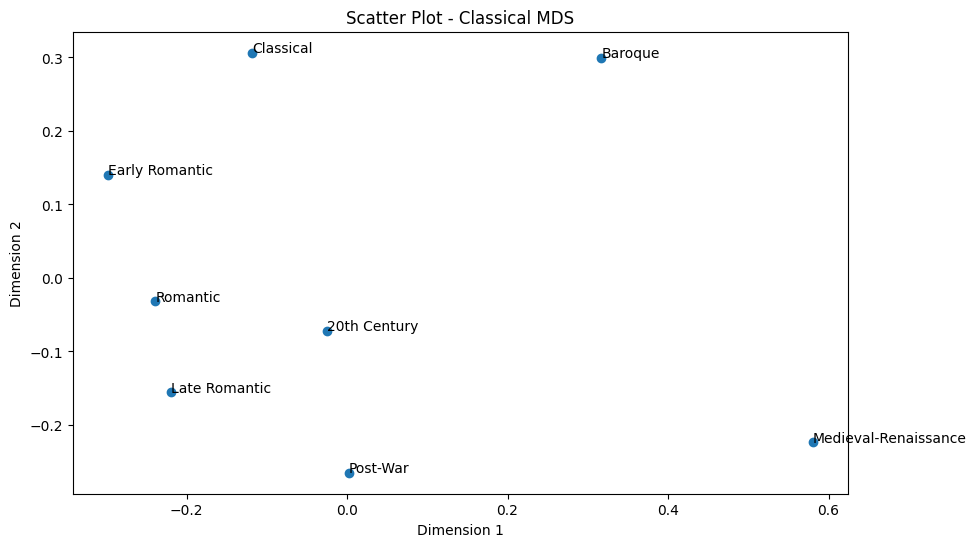

Stress value: 0.27598900193504405


In [44]:
mds = MDS(n_components=2, dissimilarity='precomputed')
mds_result = mds.fit_transform(Delta)

plt.figure(figsize=(10, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1])

for i, category in enumerate(contingency_table.columns):
    plt.annotate(category, (mds_result[i, 0], mds_result[i, 1]))

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot - Classical MDS')
plt.show()

print("Stress value:", mds.stress_)

--- 

<b>d)</b> Neka je $\mathbf C$ kontingencijska tablica s početka ovog zadatka.
Neka je mjera sličnosti između dvaju stilskih razdoblja $i$ i $j$ definirana na način:
\begin{equation}
\mathit{sim}\left(i, j\right) = \sum_{k = 0}^N \frac{\min \left\{C_{k, i}, C_{k, j} \right\}}{\max \left\{C_{k, i}, C_{k, j}\right\}}
\end{equation}
<b>Izračunajte sličnosti</b> između svih parova stilskih razdoblja. Zatim, sami izvedite neku mjeru različitosti temeljem izračunate mjere sličnosti.
Konačno, <b>izračunajte matricu različitosti</b> koja sadrži različitosti svih parova stilskih razdoblja.<br>
Kako se rezultati razlikuju u odnosu na 3. b)?

In [45]:
matrica_slicnosti = np.zeros(((len(contingency_table.columns), len(contingency_table.columns))))

for i in range(len(contingency_table.columns)):
    for j in range(len(contingency_table.columns)):
        sum_values = 0
        for k in range(contingency_table.shape[0]):
            min_value = min(contingency_table.iloc[k, i], contingency_table.iloc[k, j])
            max_value = max(contingency_table.iloc[k, i], contingency_table.iloc[k, j])
            if max_value != 0:
                sum_values += min_value / max_value
        matrica_slicnosti[i, j] = sum_values
matrica_razlicitosti = np.max(matrica_slicnosti) - matrica_slicnosti

matrica_razlicitosti_df = pd.DataFrame(matrica_razlicitosti, index=contingency_table.columns, columns=contingency_table.columns)
matrica_razlicitosti_df


epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
epoch,,,,,,,,
20th Century,0.000000,23.378179,21.176283,20.168780,19.413872,30.552746,19.007720,17.206799
Baroque,23.378179,14.000000,28.306306,26.152381,27.341603,30.884598,26.798765,28.413618
Classical,21.176283,28.306306,11.000000,21.038309,22.219106,30.397619,24.218634,22.574757
Early Romantic,20.168780,26.152381,21.038309,7.000000,20.014838,29.489706,22.774145,20.884401
Late Romantic,19.413872,27.341603,22.219106,20.014838,6.000000,30.616721,22.776926,17.999033
Medieval-Renaissance,30.552746,30.884598,30.397619,29.489706,30.616721,23.000000,28.770068,30.595818
Post-War,19.007720,26.798765,24.218634,22.774145,22.776926,28.770068,9.000000,23.342545
Romantic,17.206799,28.413618,22.574757,20.884401,17.999033,30.595818,23.342545,3.000000


---

<b>e)</b>
Provedite postupak <b>nemetričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu različitosti.</b> <br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

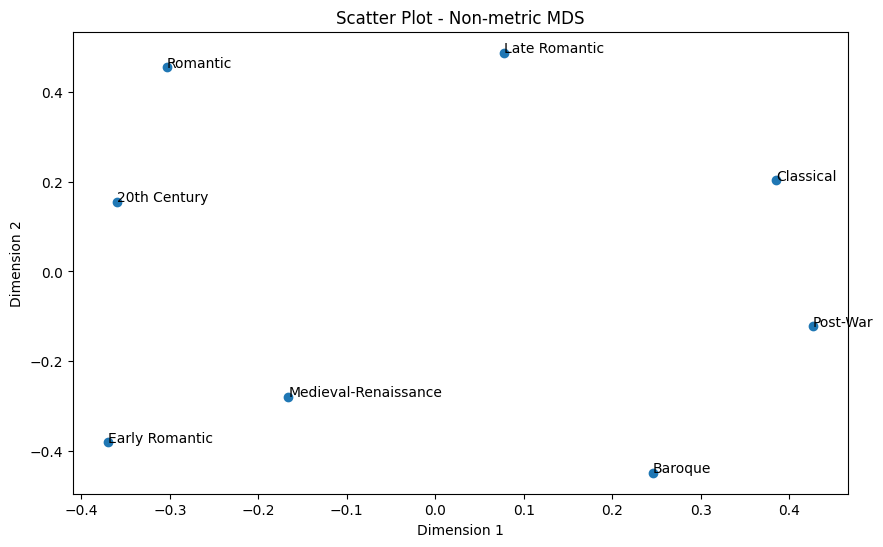

Stress value: 0.6153411922922306


In [46]:
mds = MDS(n_components=2, dissimilarity='precomputed', metric=False)
mds_result = mds.fit_transform(matrica_razlicitosti)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mds_result[:, 0], mds_result[:, 1])
for i, category in enumerate(contingency_table.columns):
    plt.annotate(category, (mds_result[i, 0], mds_result[i, 1]))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot - Non-metric MDS')
plt.show()

# Calculate the stress value
stress = mds.stress_
print("Stress value:", stress)

---

## 4. Analiza korespondencije

<b>a) </b>
**Kreirajte** novi podskup podataka tako da sadrži samo skladbe **prvih 5&ndash;10 skladatelja** po nekom kriteriju &mdash; proizvoljno odaberite kriterij po kojemu ćete ih poredati (npr. ukupan broj skladbi, ukupan broj glasova po svim skladbama, prosječan broj glasova po svim skladbama, ili samo odaberite 5&ndash;10 skladatelja po vlastitom izboru).
Zatim **odredite** koje kategorije skladbi se najčešće pojavljuju u dobivenom podskupu, te unutar njega zadržite samo skladbe koje pripadaju otprlike **5&ndash;10 najčešćih kategorija**.

In [47]:
composer_compositions = data['composer'].value_counts()
sorted_composers = composer_compositions.sort_values(ascending=False)
selected_composers = sorted_composers.head(8).index 
selected_categories = data[data['composer'].isin(selected_composers)]['category'].value_counts().head(8).index

filtered_data = data[(data['composer'].isin(selected_composers)) & (data['category'].isin(selected_categories))]
filtered_data

,Unnamed: 0,title,category,composer,year,epoch,country,stars
2,3,"Symphony No. 9 in D Minor, Op. 125",Symphony,Ludwig van Beethoven,1824,Early Romantic,Germany,2084
6,7,"Brandenburg Concertos, BWV 1046–1051",Unsorted Orchestral,Johann Sebastian Bach,1721,Baroque,Germany,1263
7,8,"Symphony No. 5 in C Minor, Op. 67",Symphony,Ludwig van Beethoven,1808,Early Romantic,Germany,1251
9,10,"Symphony No. 7 in A Major, Op. 92",Symphony,Ludwig van Beethoven,1812,Early Romantic,Germany,1101
10,11,"Symphony No. 40 in G Minor, K. 550",Symphony,Wolfgang Amadeus Mozart,1788,Classical,Austria,1022
...,...,...,...,...,...,...,...,...
1519,1520,"4 Songs, Op. 43",Lieder / Song,Johannes Brahms,1864,Romantic,Germany,1
1525,1526,"Symphony No. 101 in D Major, H. 1/101",Symphony,Joseph Haydn,1794,Classical,Austria,1
1526,1527,"Symphony No. 6 in C Major (Little C major), D....",Symphony,Franz Schubert,1818,Early Romantic,Austria,1
1528,1529,"Piano Sonata, Hob. XVI/50",Piano Sonata,Joseph Haydn,1794,Classical,Austria,1


---

U nastavku vježbe koristite ovako generirani podskup podataka.

<b>b)</b>**Izračunajte i prikažite** kontingencijsku tablicu između skladatelja i kategorije skladbi koje su napisali.


In [48]:
contingency_table = pd.crosstab(filtered_data['composer'], filtered_data['category'])
print("Kontingencijska tablica:")
contingency_table

Kontingencijska tablica:


category,Choral orchestral,Lieder / Song,Piano Concerto,Piano Sonata,Piano Trio,String Quartet,Symphony,Unsorted Orchestral
composer,,,,,,,,
Dmitri Shostakovich,0,1,2,1,1,7,12,3
Franz Schubert,1,16,0,12,3,4,6,1
Johann Sebastian Bach,18,0,0,14,0,0,0,2
Johannes Brahms,1,4,2,8,5,3,4,6
Joseph Haydn,2,0,1,5,1,3,22,0
Ludwig van Beethoven,0,1,5,26,3,15,9,3
Robert Schumann,0,5,3,17,2,1,4,2
Wolfgang Amadeus Mozart,3,0,12,10,1,4,9,3


---

<b>c)</b> **Prikažite** graf raspršenja analize korespondencije između varijabli `composer` i `category` koristeći prve dvije komponente. 
Jasno <b>označite</b> (bojom i oblikom markera, ili natpisima) kojeg skladatelja, odnosno kategoriju, predstavlja pojedina točka.
<b>Ispišite</b> udjele objašnjene varijance za sve komponente, te ukupnu inerciju.
Također, na grafu <b>označite ishodište</b> radi lakše interpretacije. <br>
Obratite pozornost na objašnjenu varijancu temeljem prve dvije komponente. Na temelju dobivenog grafa i kontingencijske tablice iz prethodnog zadatka pokušajte odgovoriti na sljedeća pitanja:

-   Koji skladatelji se najviše izdvajaju po pojedinoj kategoriji?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim skladateljima?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim kategorijama?
-   Koji skladatelji su pisali prosječan broj skladbi u svim kategorijama?

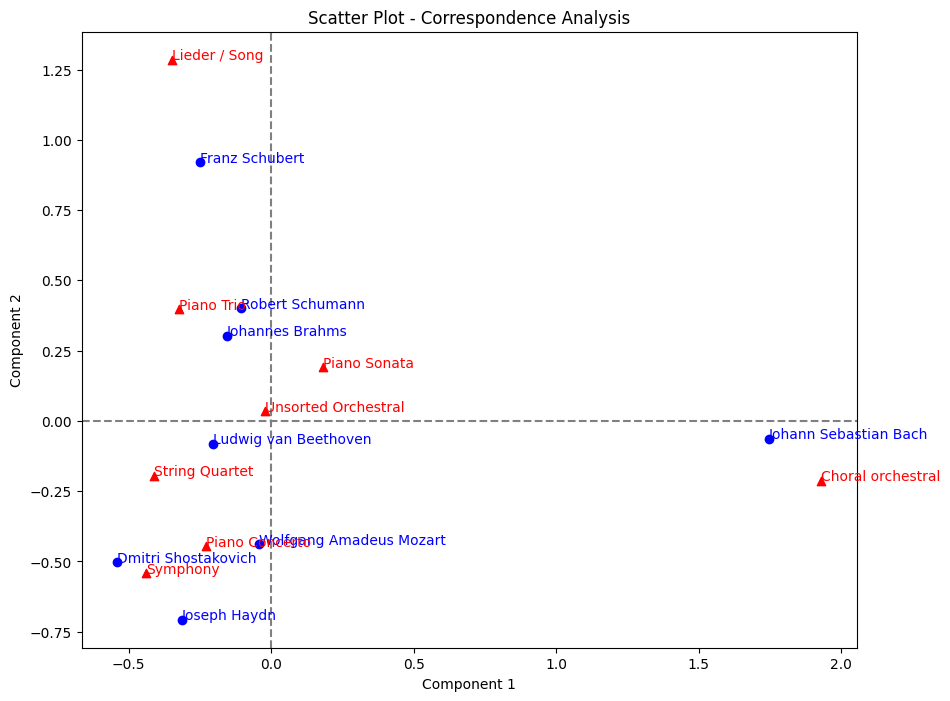

Total inertia 0.9415415757339483
Explained variance for each component:
Component 1: 41.77%
Component 2: 26.62%


In [49]:

ca = MCA(n_components=2)
ca.fit(contingency_table)

row_coordinates = ca.row_coordinates(contingency_table)
column_coordinates = ca.column_coordinates(contingency_table)

plt.figure(figsize=(10, 8))
plt.scatter(row_coordinates.iloc[:, 0], row_coordinates.iloc[:, 1], marker='o', color='b')
plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], marker='^', color='r')
for i, composer in enumerate(row_coordinates.index):
    plt.annotate(composer, (row_coordinates.iloc[i, 0], row_coordinates.iloc[i, 1]), color='b')

for i, category in enumerate(column_coordinates.index):
    plt.annotate(category, (column_coordinates.iloc[i, 0], column_coordinates.iloc[i, 1]), color='r')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter Plot - Correspondence Analysis')
plt.axhline(0, linestyle='--', color='grey')
plt.axvline(0, linestyle='--', color='grey')

plt.show()

explained_variance = ca.percentage_of_variance_
print("Total inertia", ca.total_inertia_)
print("Explained variance for each component:")
for i, variance in enumerate(explained_variance):
    print("Component {}: {:.2f}%".format(i+1, variance))


---

<b>d)</b> <b>Provedite analizu korespondencije</b> između varijabli `country` i `epoch`.
U obzir uzmite <b>reducirani skup podataka</b> koji sadrži samo sljedeće države: `["Germany", "Austria", "Italy", "France", "Hungary", "Russia", "United States"]`.
<b>Prikažite graf</b> kao i u prethodnom podzadatku, te <b>ispišite</b> udjele objašnjene varijance i ukupnu inerciju.
Što možete zaključiti o odnosima država i stilskih razdoblja pomoću grafa?

In [52]:
contingency_table_2

epoch,20th Century,Baroque,Classical,Early Romantic,Romantic
country,,,,,
Austria,0,0,76,43,0
Germany,0,34,0,62,67
Russia,27,0,0,0,0


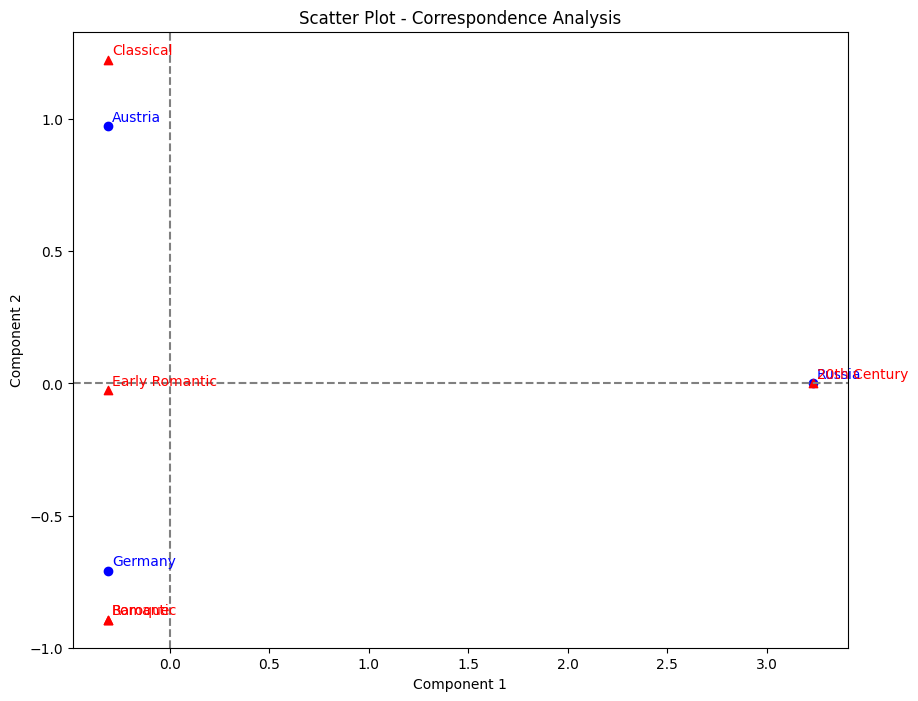

Total inertia: 1.6308648612819359
Explained variance for each component:
Component 1: 61.32%
Component 2: 38.68%


In [51]:
selected_countries = ["Germany", "Austria", "France", "Hungary", "Russia", "United States","Italy"]
selected_data = filtered_data[filtered_data['country'].isin(selected_countries)]

contingency_table_2 = pd.crosstab(selected_data['country'], selected_data['epoch'])
ca = MCA(n_components=2)
ca.fit(contingency_table_2)

row_coordinates = ca.row_coordinates(contingency_table_2)
column_coordinates = ca.column_coordinates(contingency_table_2)


plt.figure(figsize=(10, 8))
plt.scatter(row_coordinates.iloc[:, 0], row_coordinates.iloc[:, 1], marker='o', color='b')
plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], marker='^', color='r')

for i, composer in enumerate(row_coordinates.index):
    plt.annotate(composer, (row_coordinates.iloc[i, 0]+0.02, row_coordinates.iloc[i, 1]+0.02), color='b')

for i, category in enumerate(column_coordinates.index):
    plt.annotate(category, (column_coordinates.iloc[i, 0]+0.02, column_coordinates.iloc[i, 1]+0.02), color='r')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter Plot - Correspondence Analysis')
plt.axhline(0, linestyle='--', color='grey')
plt.axvline(0, linestyle='--', color='grey')

plt.show()

explained_variance = ca.percentage_of_variance_
print("Total inertia:", ca.total_inertia_)
print("Explained variance for each component:")
for i, variance in enumerate(explained_variance):
    print("Component {}: {:.2f}%".format(i+1, variance))